In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Función para leer los archivos CSV
def dataset_reader(path,name):
    df = pd.read_csv(path)
    d1, d2 = df.shape[0], df.shape[1]
    print(f'El dataset tiene {d1} número de filas y tiene {d2} numero de columnas')
    df = df.drop_duplicates()
    d1, d2 = df.shape[0], df.shape[1]
    print(f'Después de quitar  duplicados quedan {d1} número de filas y {d2} número de columnas')
    return df
costo_mr = dataset_reader("costo_marginal_real.csv",'costo marginal real')
costo_mr.head()

El dataset tiene 4309951 número de filas y tiene 7 numero de columnas
Después de quitar  duplicados quedan 4309951 número de filas y 7 número de columnas


,barra_mnemotecnico,barra_referencia_mnemotecnico,fecha,hora,costo_en_dolares,costo_en_pesos,nombre
0,BA01T005SE075T005,BA02T002SE032T002,2019-04-06,25,62.24,41.47176,BA S/E LORETO 15KV
1,BA01T005SE175T005,BA02T002SE032T002,2019-04-06,25,62.56,41.68498,BA S/E RETIRO 13.2KV
2,BA03R002SE002R002,BA02T002SE032T002,2019-04-06,25,60.04,40.00585,BA S/E ALTAMIRANO 12.5KV BP1
3,BA01R002SE012R002,BA02T002SE032T002,2019-04-06,25,61.65,41.07863,BA S/E CURACAVI 44KV B1
4,BA03R002SE013R002,BA02T002SE032T002,2019-04-06,25,59.55,39.67936,BA S/E EL MANZANO (ENEL DISTRIBUCIÓN) 23KV BP1


In [3]:
# Lectura del archivo de costo_marginal_programado
costo_mp = dataset_reader("costo_marginal_programado.csv",'costo marginal programado')
costo_mp.head()

El dataset tiene 1192124 número de filas y tiene 5 numero de columnas
Después de quitar  duplicados quedan 1187841 número de filas y 5 número de columnas


,mnemotecnico_barra,nombre_barra,fecha,hora,costo
0,BA01T002SE002T002,BA S/E ALTO JAHUEL 110KV SECCION 1,2019-01-01,1,49.897334
1,BA01T002SE002T002,BA S/E ALTO JAHUEL 110KV SECCION 1,2019-01-01,2,50.471616
2,BA01T002SE002T002,BA S/E ALTO JAHUEL 110KV SECCION 1,2019-01-01,3,50.077821
3,BA01T002SE002T002,BA S/E ALTO JAHUEL 110KV SECCION 1,2019-01-01,4,49.796216
4,BA01T002SE002T002,BA S/E ALTO JAHUEL 110KV SECCION 1,2019-01-01,5,49.796216


In [4]:
# Se cambia el nombre de la columna mnemotecnico_barra por barra_mnemotecnico
costo_mp = costo_mp.rename({'mnemotecnico_barra':'barra_mnemotecnico'}, axis=1)

In [5]:
# Se hace una nueva revisión para deshechar cualquier valor nulo
costo_mp.drop_duplicates(['barra_mnemotecnico', 'fecha', 'hora', 'nombre_barra']).shape

(1003895, 5)

In [6]:
# Se realiza un merge para unir los datos de costo_marginal_real y costo_marginal_programado
costo_marginal = costo_mr.merge(costo_mp, 
                          left_on=['barra_mnemotecnico','fecha','hora','nombre'],
                          right_on=['barra_mnemotecnico','fecha','hora','nombre_barra'],
                          how='left')
d1,d2 = costo_marginal.shape[0], costo_marginal.shape[1]
print(f'Esta nueva base tiene {d1} número de filas y {d2} número de columnas')
costo_marginal = costo_marginal.drop_duplicates()
d1,d2 = costo_marginal.shape[0], costo_marginal.shape[1]
print(f'Esta nueva base tiene {d1} número de filas y {d2} número de columnas después de quitar duplicados')
costo_marginal.head(2)

Esta nueva base tiene 4322410 número de filas y 9 número de columnas
Esta nueva base tiene 4322410 número de filas y 9 número de columnas después de quitar duplicados


,barra_mnemotecnico,barra_referencia_mnemotecnico,fecha,hora,costo_en_dolares,costo_en_pesos,nombre,nombre_barra,costo
0,BA01T005SE075T005,BA02T002SE032T002,2019-04-06,25,62.24,41.47176,BA S/E LORETO 15KV,NaN,NaN
1,BA01T005SE175T005,BA02T002SE032T002,2019-04-06,25,62.56,41.68498,BA S/E RETIRO 13.2KV,NaN,NaN


In [7]:
# Se quitan columnas duplicadas 
costo_marginal.drop('nombre', axis=1, inplace=True)
#costo_mr.drop('costo_en_pesos', axis=1, inplace=True)

In [8]:
costo_marginal = costo_marginal.rename({'fecha_x':'fecha_programado','hora_x':'hora_programado','costo':'costo_programado','fecha_y':'fecha_real','hora_y':'hora_real','costo_en_dolares':'costo_real'}, axis=1)
costo_marginal.head(2)

,barra_mnemotecnico,barra_referencia_mnemotecnico,fecha,hora,costo_real,costo_en_pesos,nombre_barra,costo_programado
0,BA01T005SE075T005,BA02T002SE032T002,2019-04-06,25,62.24,41.47176,NaN,NaN
1,BA01T005SE175T005,BA02T002SE032T002,2019-04-06,25,62.56,41.68498,NaN,NaN


In [9]:
# Se conoce cuántas fechas se abarcan en la nueva base de costo_marginal
fecha_min = costo_marginal['fecha'].min()
fecha_max = costo_marginal['fecha'].max()
n_dias = costo_marginal['fecha'].nunique()
print(f'Este dataset abarca desde esta fecha {fecha_min} hasta esta fecha {fecha_max}, equivalente a {n_dias} días.')

Este dataset abarca desde esta fecha 2019-01-01 hasta esta fecha 2019-06-30, equivalente a 181 días.


Son 25 horas únicas, cuando se observa en una lista qué horas abarca, se puede observar que existe un 25. Dato anómalo,puesto que un día solo tiene 24 horas.

In [10]:
# Se conoce cuántas horas se abarcan en la nueva base de costo_marginal
n_horas = costo_marginal['hora'].nunique()
horas = costo_marginal['hora'].unique()
print(f'Son {n_horas} únicas')
print(list(horas))

Son 25 únicas
[25, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


# Preguntas

**1.-Barras**

Para cuantas barras se programa el costo? 

In [11]:
def numero_barras_unicas(costo_marginal,columna):
    barras_unicas = costo_marginal[columna].nunique()
    print(f'Existen {barras_unicas} barras únicas en la columna barra_mnemotecnico')
    return barras_unicas
barras_unicas = numero_barras_unicas(costo_marginal,'barra_mnemotecnico')

Existen 1020 barras únicas en la columna barra_mnemotecnico


• En promedio, el costo se programa para 60 barras.

In [12]:
# Se saca el promedio del costo programado (costo) por barras 
barra_promedio_costo = costo_marginal.groupby(['barra_mnemotecnico'])['costo_programado'].mean().reset_index()
barras_nulas = barra_promedio_costo.isnull().sum()[1]
print(f'{round((1020 - barras_nulas) / 1020, 4) * 100}% del total de barras que se pueden observar en la base.')


21.57% del total de barras que se pueden observar en la base.


**2.- Construcción de variables**

In [13]:
# Desviación calculado de la diferencia entre el costo real y el costo programado
costo_marginal.loc[costo_marginal['costo_programado'].notnull(),'desviación'] = costo_marginal['costo_real'].notnull() - costo_marginal['costo_programado']

# Se calcula la desviación_pct
costo_marginal.loc[costo_marginal['costo_programado'].notnull(),'desviacion_pct']= ((costo_marginal['costo_real'].notnull() - costo_marginal['costo_programado']) / costo_marginal['costo_real']) * 100

# Se quitan valores como consecuencia de las divisiones por 0 
costo_marginal.replace([np.inf, -np.inf], np.nan, inplace = True)

# desviación_cat, vale 1 si la desviacion_pct absoluta es mayor a 15% o menor a -15%
costo_marginal.loc[(costo_marginal['desviacion_pct'].notnull()) & ((costo_marginal['desviacion_pct'] > 15) | (costo_marginal['desviacion_pct'] < -15)), 'desviacion_cat'] = 1
# Si los valores no son uno, entonces se rellenan con 0
costo_marginal.loc[(costo_marginal['desviacion_pct'].notnull()) & (costo_marginal['desviacion_cat'].isnull()), 'desviacion_cat'] = 0

El promedio y la desviacion estandar es 0.00566583310752422 y el promedio 0.9981950501473734


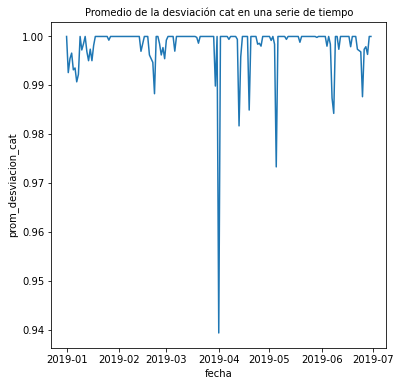

In [14]:
prom_dcat = costo_marginal.groupby(['fecha'])['desviacion_cat'].mean().reset_index()
prom_dcat.columns = ['fecha', 'prom_desviacion_cat']
prom_dcat['fecha'] = pd.to_datetime(prom_dcat['fecha'])
plt.figure(figsize = (6, 6))
sns.lineplot(x = prom_dcat['fecha'], y = prom_dcat['prom_desviacion_cat'])
plt.title('Promedio de la desviación cat en una serie de tiempo', fontsize = 10)
std_cat = prom_dcat['prom_desviacion_cat'].std()
promedio = prom_dcat['prom_desviacion_cat'].mean()
print(f'El promedio y la desviacion estandar es {std_cat} y el promedio {promedio}')  

**3.- Visualización de datos**

In [15]:
# Para eliminar el cmg_real = 0
costo_marginal.drop(costo_marginal.loc[costo_marginal['costo_real']==0].index, inplace=True)

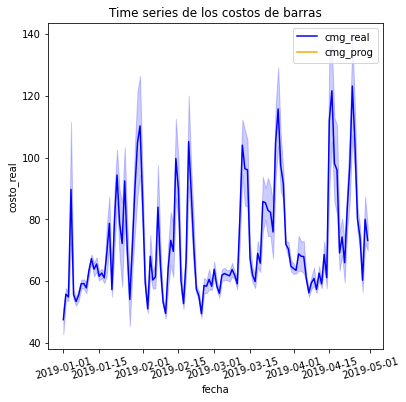

In [16]:
def time_plot_costo_barra(codigo_barra, fecha_inicial, fecha_final):
    # Se toma como input un codigo de barra
    time_pcb = costo_marginal[costo_marginal['barra_mnemotecnico'] == codigo_barra]
    # Se toma la fecha inicial y la fecha final para graficar
    time_pcb = time_pcb[(time_pcb['fecha'] >= fecha_inicial) & (time_pcb['fecha'] <= fecha_final)]
     # Transformar fechas en datetime
    time_pcb['fecha'] = pd.to_datetime(time_pcb['fecha'])
    plt.figure(figsize = (6, 6))
    sns.lineplot(x = time_pcb['fecha'], y = time_pcb['costo_real'], data = costo_marginal, label = 'cmg_real', color='blue')
    sns.lineplot(x = time_pcb['fecha'], y = time_pcb['costo_programado'], data = costo_marginal, label = 'cmg_prog', color='orange')
    
    plt.xticks(rotation=15)
    plt.title('Time series de los costos de barras')
    plt.show()
    return time_pcb['fecha']

time_series_costo_barras = time_plot_costo_barra('BA01T005SE075T005','2019-01-01','2019-04-30')

• Se puede observar que los costos reales sobrepasan los costos programados, no existe un buen ajuste en los costos programados.

**4.- Base para modelos**

In [17]:
# Se lee el el archivo csv de "base para prediciones"
bm = dataset_reader('base_para_prediccion.csv','base para prediccion')
bm.head()

El dataset tiene 112779 número de filas y tiene 15 numero de columnas
Después de quitar  duplicados quedan 112779 número de filas y 15 número de columnas


,nemotecnico_se,fecha,hora,gen_eolica_total_mwh,gen_geotermica_total_mwh,gen_hidraulica_total_mwh,gen_solar_total_mwh,gen_termica_total_mwh,cmg_real,cmg_prog,cmg_desv,cmg_desv_pct,n_barras,demanda_mwh,cap_inst_mw
0,SE031G216,2019-01-04 00:00:00 UTC,1,NaN,NaN,NaN,NaN,0.0,56.2,55.627852,0.57,1.02,2,1210767,13.20785
1,SE031G216,2019-01-04 00:00:00 UTC,2,NaN,NaN,NaN,NaN,0.0,56.2,55.376645,0.82,1.48,2,113232,13.20785
2,SE031G216,2019-01-04 00:00:00 UTC,3,NaN,NaN,NaN,NaN,0.0,56.2,59.531891,-3.33,-5.59,2,1089415,13.20785
3,SE031G216,2019-01-04 00:00:00 UTC,4,NaN,NaN,NaN,NaN,0.0,56.2,174.378923,-118.18,-67.77,2,1096867,13.20785
4,SE031G216,2019-01-04 00:00:00 UTC,5,NaN,NaN,NaN,NaN,0.0,56.2,172.820310,-116.62,-67.48,2,1071851,13.20785


• En este dataset casi todas las variables son numéricas (float e integers), excepto nemotecnico_se que es una variable categórica (object) y solo hay una fecha clasificada como object, pero que se transformará en datetime.

• Como se puede observar, en casi todas las columnas hay datos nulos. Excepto en la de  gen_eolica_total_mwh y gen_geotermica_total_mwh. 

In [18]:
# Análisis exploratorio para conocer el tipo de variables de la base así como sus valores nulos
bm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112779 entries, 0 to 112778
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   nemotecnico_se            112779 non-null  object 
 1   fecha                     112779 non-null  object 
 2   hora                      112779 non-null  int64  
 3   gen_eolica_total_mwh      0 non-null       float64
 4   gen_geotermica_total_mwh  0 non-null       float64
 5   gen_hidraulica_total_mwh  34184 non-null   float64
 6   gen_solar_total_mwh       41818 non-null   float64
 7   gen_termica_total_mwh     61863 non-null   float64
 8   cmg_real                  112779 non-null  float64
 9   cmg_prog                  112779 non-null  float64
 10  cmg_desv                  112779 non-null  float64
 11  cmg_desv_pct              112779 non-null  float64
 12  n_barras                  112779 non-null  int64  
 13  demanda_mwh               112779 non-null  i

In [19]:
# Se transforma la fecha a tipo de dato datetime
bm['fecha'] = pd.to_datetime(bm['fecha'])
# Se transforma la fecha a variables de año, mes, semana, día y fin de semana
bm['año'] = bm['fecha'].dt.year
bm['mes'] = bm['fecha'].dt.month
bm['semana_año'] = bm['fecha'].dt.isocalendar().week
bm['dia_mes'] = bm['fecha'].dt.dayofyear
bm['dia_semana'] = bm['fecha'].dt.dayofweek

# Identificacion para saber si es fin de semana
bm.loc[bm['dia_semana'].isin([5, 6]), 'fin_de_semana'] = 1
bm['fin_de_semana'].fillna(0, inplace = True)
bm.head(2)

,nemotecnico_se,fecha,hora,gen_eolica_total_mwh,gen_geotermica_total_mwh,gen_hidraulica_total_mwh,gen_solar_total_mwh,gen_termica_total_mwh,cmg_real,cmg_prog,...,cmg_desv_pct,n_barras,demanda_mwh,cap_inst_mw,año,mes,semana_año,dia_mes,dia_semana,fin_de_semana
0,SE031G216,2019-01-04 00:00:00+00:00,1,NaN,NaN,NaN,NaN,0.0,56.2,55.627852,...,1.02,2,1210767,13.20785,2019,1,1,4,4,0.0
1,SE031G216,2019-01-04 00:00:00+00:00,2,NaN,NaN,NaN,NaN,0.0,56.2,55.376645,...,1.48,2,113232,13.20785,2019,1,1,4,4,0.0


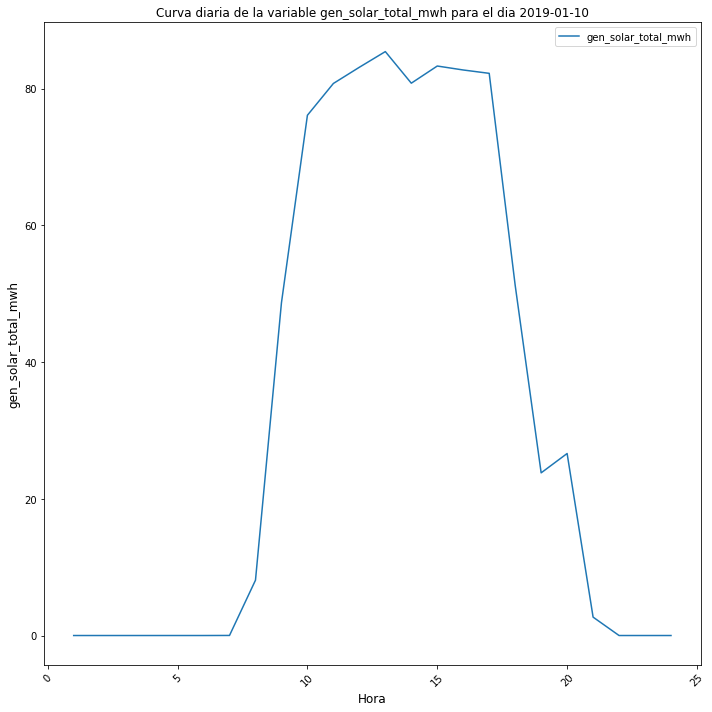

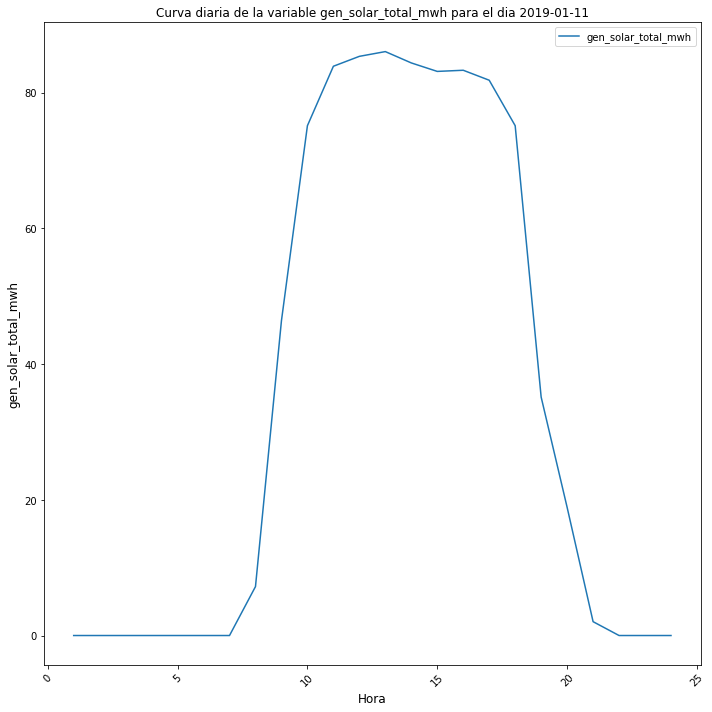

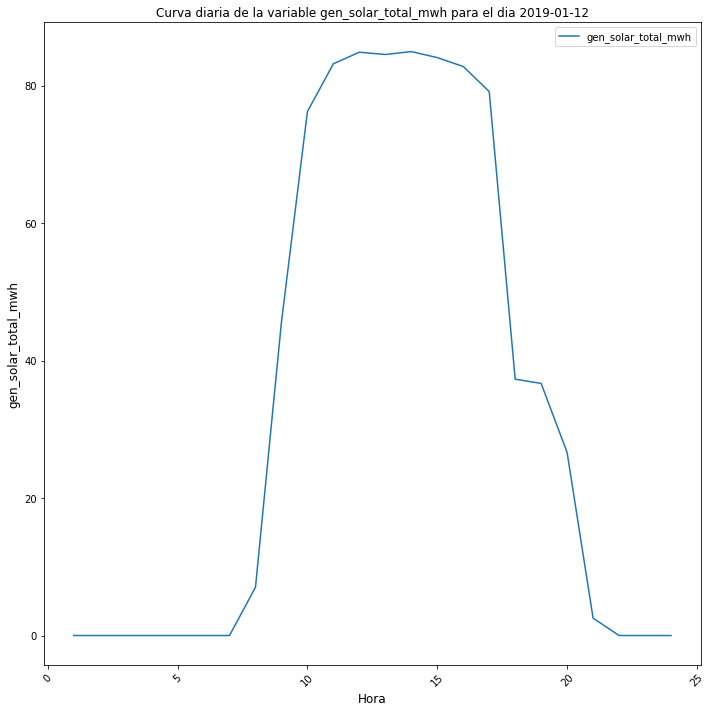

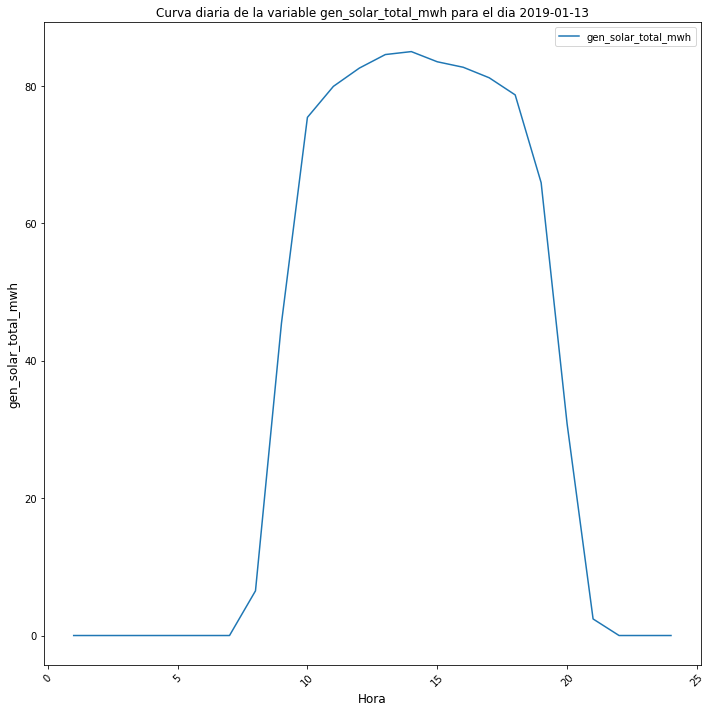

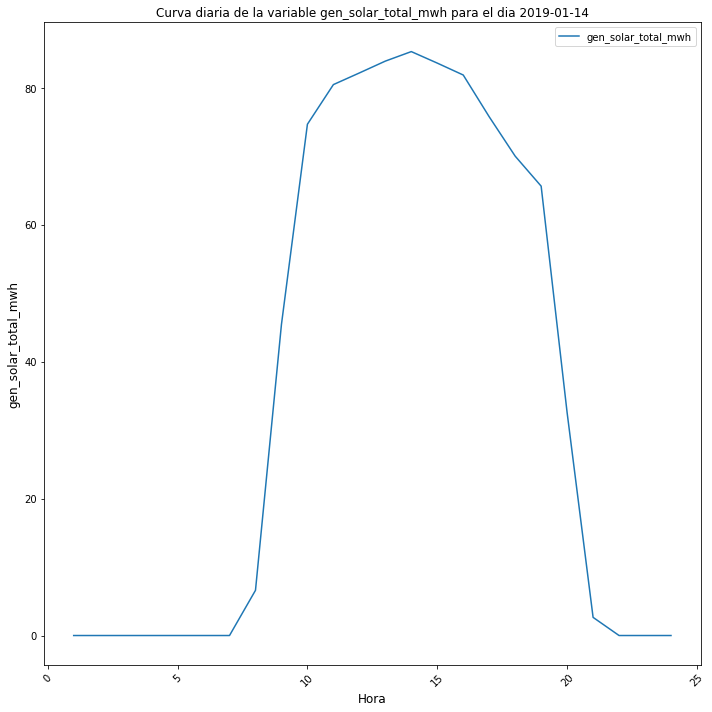

In [20]:
# Función que grafique multiples time series diariamente con una lista de fechas
def serie_de_tiempo(codigo_barra, variable, fechas = ['2019-01-10', '2019-02-10']):
    mts = bm[bm['nemotecnico_se'] == codigo_barra]
    # Aquí se grafican las fechas
    for date in fechas:
        mts_g = mts[mts['fecha'] == date].sort_values('hora')
        plt.figure(figsize = (10, 10))
        plt.plot(mts_g['hora'], mts_g[variable], label = variable)
        plt.tick_params(axis = 'x', labelsize = 10, rotation = 45)
        plt.tick_params(axis = 'y', labelsize = 10)
        plt.xlabel('Hora', fontsize = 12)
        plt.ylabel(variable, fontsize = 12)
        plt.title(f'Curva diaria de la variable {variable} para el dia {date}')
        plt.legend()
        plt.tight_layout()
        plt.show()
            
serie_de_tiempo('SE005T002', 'gen_solar_total_mwh', ['2019-01-10', '2019-01-11', '2019-01-12', 
                                                     '2019-01-13', '2019-01-14'])